# Cumulatieve reistijd

### Dit python notebook laat een methode zien om op basis van een stroombaanberekening in iMOD de cumulatieve reistijd te bepalen naar pompputten. 

Nodig zijn;
    - een iff-bestand afkomstig uit een stroombaanberekening,
    - een ipf-bestand met pompputten bevat. Het ipf bestand moet in ieder geval bevatten;
        * x en y coordinaten van het filter
        * modellaag waar het filter in zit
        * label voor de pompput (meerdere pompputten kunnen hetzelfde label bevatten, de reistijden worden dan geaggregeerd.)

### Stap 1
importeren modules ipf en iff uit pyimod. En vervolgens in lezen van het ipf- en iff-bestand

In [1]:
from pyimod import ipf, iff

putten      = r'C:\LOZA\Nijbeets_MIPWA\Stroombanen\tools\wel.ipf'
stroombanen = r'C:\LOZA\Nijbeets_MIPWA\Stroombanen\data\6_B1_BOEZEM\imodpath_plas.iff'

putten_ipf      = ipf.ipf(putten, ['f', 'f', 'f', 's', 's', 'f', 'f', 'i'])
stroombanen_iff = iff.iff(stroombanen)

### Stap 2
Vervolgens wordt per eindpunt uit het iff-bestand gekeken of dit overeenkomt met een pompput uit het ipf-bestand. Voorwaarde voor overeenkomt is dat de horizontale afstand kleiner is dan 'dmin' en de modellaag van het eindpunt overeenkomt met die van de pompput. Wanneer er een overeenkomst is wordt de reistijd toegevoegd aan een dictonary, waarbij de key gelijk is aan het label van de betreffende pompput.

De variabele 'xcol', 'ycol', 'lcol' en 'labcol' geven het kolomnummer in het ipf-bestand van respectievelijk x-coordinaat, y-coordinaat, modellaag en label. 

In [2]:
dmin = 25.0
xcol, ycol, lcol, labcol = 0, 1, 7, 3
reistijden = {}
for end in stroombanen_iff.endpoints.itervalues():
    for pnt in putten_ipf.features:
        d = ((pnt[xcol]-end[0])**2+(pnt[ycol]-end[1])**2)**0.5
        if d<dmin and pnt[lcol]==end[4]:
            label = pnt[labcol]
            if reistijden.has_key(label):
                reistijden[label].append(end[3])                
            else:
                reistijden[label] = [end[3]]

### Stap 3
In de volgende stap worden de reistijden per pompput geplot in een cumulatieve frequentie verdeling. Hierbij is de x-as (reistijd) in logaritmische schaal.

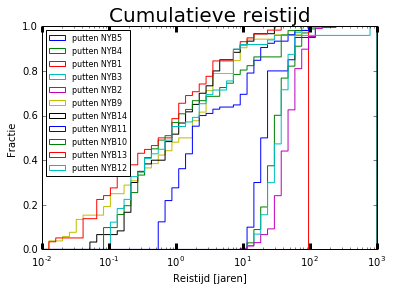

In [5]:
import matplotlib.pyplot as plt
import numpy

bins = numpy.logspace(-2, 3, 50)
for lab, t in reistijden.iteritems():
    plt.hist(t, bins=bins, normed=1, histtype='step', cumulative=True, label='putten '+ lab)

plt.ylim([0, 1])
plt.legend(loc=2, prop={'size':8})
plt.tick_params(axis='x', length=6, width=3)
plt.gca().set_xscale("log")
plt.title("Cumulatieve reistijd", fontsize=20)
plt.xlabel('Reistijd [jaren]', fontsize=10)
plt.ylabel('Fractie', fontsize=10)
plt.show()